In [36]:
from models.models import ResNet2dplus1d_18
import torch
import configs.pyroot_config as pyroot_config
import os
from torch.utils.data import default_collate
import torch
from src.data.mice_dataset import MouseSniffingVideoDatasetMultipleFramesLabeled
import torchvision.transforms.v2 as tt
from models.lightning_module import DeepSniff
from models.models import MobileNetV3, ResNet2dplus1d_18

config_paths = pyroot_config.ConfigPaths()

### TRANSFORMS

loading_transforms=tt.Compose([tt.PILToTensor(),
                        tt.Resize([112, 112] ,antialias=True)])
                        
transforms = tt.Compose([
                        tt.ConvertImageDtype(torch.float32),
                        tt.Normalize(mean=[0.36], std=[0.2]),
                        #permute
                        tt.Lambda(lambda x: x.permute(1, 0, 2, 3) ),
                        ])


transforms_val = tt.Compose([
                            tt.ConvertImageDtype(torch.float32),
                            tt.Normalize(mean=[0.36], std=[0.2]),
                            #permute
                            tt.Lambda(lambda x: x.permute(1, 0, 2, 3) ),
                            ])

### DATASET

data_dir = config_paths.data_processed / 'sniff-training-dataset'

#list all subdirs
trails = [f.path for f in os.scandir(data_dir) if f.is_dir()]
trail = trails[0]

window_size = 5
signal_window_size = 1


dataset = MouseSniffingVideoDatasetMultipleFramesLabeled(root_dir=trail,
                                                                    video_path='cropped_frames',
                                                                    signal_path='breathing_onsets.txt',
                                                                    window_size=window_size,
                                                                    signal_window_size=signal_window_size,
                                                                    transforms=transforms,
                                                                    loading_transforms=loading_transforms,
                                                                    load_in_memory=True)
                                                                    
print(len(dataset))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=default_collate)

418


In [37]:
model = ResNet2dplus1d_18()

In [38]:
sample = next(iter(dataloader))[0]
print(sample.shape)
#swap dim 1 and 2
# repeat channel dim
print(sample.shape)
model(sample)

torch.Size([1, 3, 5, 112, 112])
torch.Size([1, 3, 5, 112, 112])


tensor([[0.0754]], grad_fn=<AddmmBackward0>)

In [6]:
import math
lr_func = lambda epoch: min((epoch + 1) / (200 + 1e-8), 0.5 * (math.cos(epoch / 2000 * math.pi) + 1))

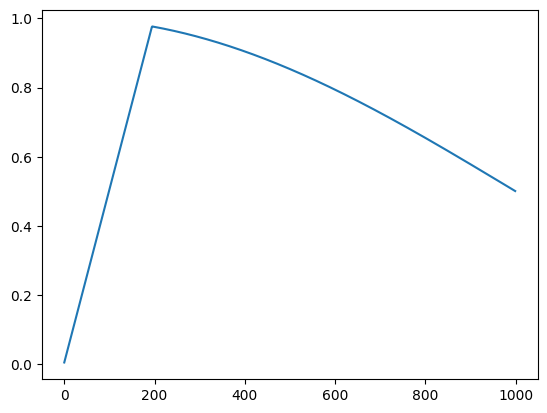

In [7]:
#plot lr_func
import matplotlib.pyplot as plt

x = range(1000)
y = [lr_func(i) for i in x]
plt.plot(x, y)